# Iris, Wine Data -> GBM, XGBoost, Light GBM

In [3]:
from sklearn import datasets as d
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
import pandas as pd
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import time
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## (1) Iris data -> GBM, XGBoost, Light GBM

In [4]:
# import iris data
iris = d.load_iris()
irisdf=pd.DataFrame(iris.data)
irisdf.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(irisdf, iris.target, test_size=0.3, random_state=0)

### Iris - GBM

#### GBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은?
정확도 약 0.96

In [8]:
# gbm
start_time=time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9630
GBM 수행 시간: 0.5 초


### Iris - XGBoost

#### xgboostclassifier를 이용하여 iris data 분류 모델을 만들어 성능을 적으시오
정확도 약 0.98
#### plot_importance를 사용하여 중요한 피처 순서대로 나열하라
2 - 3 - 0 - 1

In [16]:
# xgboostclassifier
xgb_wrapper=XGBClassifier(n_estimatiors=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
xgb_pred=xgb_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , xgb_pred))

성능 :  0.9777777777777777


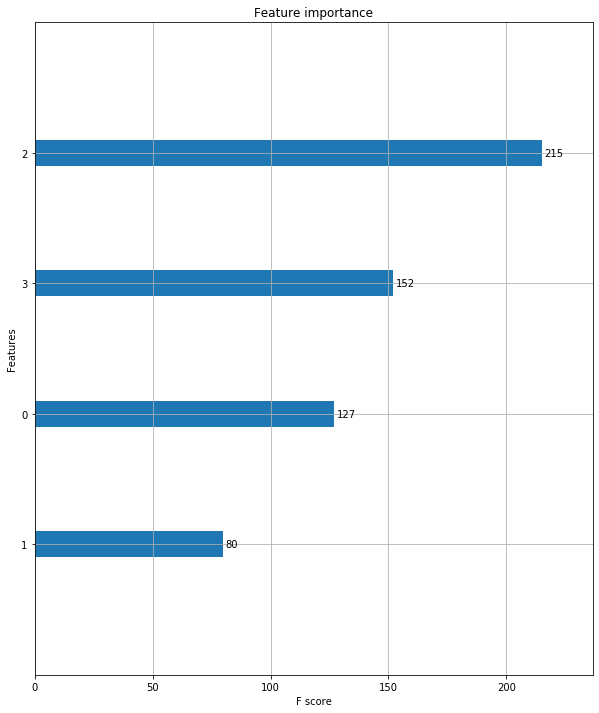

In [18]:
#plot_importance graph
fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)

### Iris - Light GBM

#### LightGBM을 이용하여 iris data 분류 모델을 만들었을 때 성능을 적으시오
정확도 약 0.98

In [19]:
# lgbm
lgbm_wrapper=LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_pred=lgbm_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , lgbm_pred))

[1]	valid_0's multi_logloss: 0.996042
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.895604
[3]	valid_0's multi_logloss: 0.805055
[4]	valid_0's multi_logloss: 0.721716
[5]	valid_0's multi_logloss: 0.660824
[6]	valid_0's multi_logloss: 0.603757
[7]	valid_0's multi_logloss: 0.552827
[8]	valid_0's multi_logloss: 0.507972
[9]	valid_0's multi_logloss: 0.469133
[10]	valid_0's multi_logloss: 0.438146
[11]	valid_0's multi_logloss: 0.406554
[12]	valid_0's multi_logloss: 0.382297
[13]	valid_0's multi_logloss: 0.354661
[14]	valid_0's multi_logloss: 0.335554
[15]	valid_0's multi_logloss: 0.309733
[16]	valid_0's multi_logloss: 0.294557
[17]	valid_0's multi_logloss: 0.280683
[18]	valid_0's multi_logloss: 0.263716
[19]	valid_0's multi_logloss: 0.253011
[20]	valid_0's multi_logloss: 0.243123
[21]	valid_0's multi_logloss: 0.23013
[22]	valid_0's multi_logloss: 0.222587
[23]	valid_0's multi_logloss: 0.215531
[24]	valid_0's multi_logloss: 0.202896
[25]	valid_0

## (2) wine data -> GBM, XGBoost, Light GBM

In [20]:
# import wine data
wine = d.load_wine()
winedf=pd.DataFrame(wine.data)
winedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(winedf, wine.target, test_size=0.3, random_state=0)

### Wine - GBM

#### GBM을 이용하여 wine data 분류 모델을 만들었을 때 성능을 적으시오.
정확도 약 0.96

In [22]:
# gbm
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9630
GBM 수행 시간: 0.4 초


### Wine - XGBoost

#### xgboostclassifier를 이용하여 wine data 분류 모델을 만들어 성능을 적으시오.
정확도 약 0.96
#### plot_importance를 사용하여 중요한 피처 4개를 순서대로 나열하라
9 - 12 - 6 - 4

In [23]:
# xgboost
xgb_wrapper=XGBClassifier(n_estimatiors=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
xgb_pred=xgb_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , xgb_pred))

성능 :  0.9629629629629629


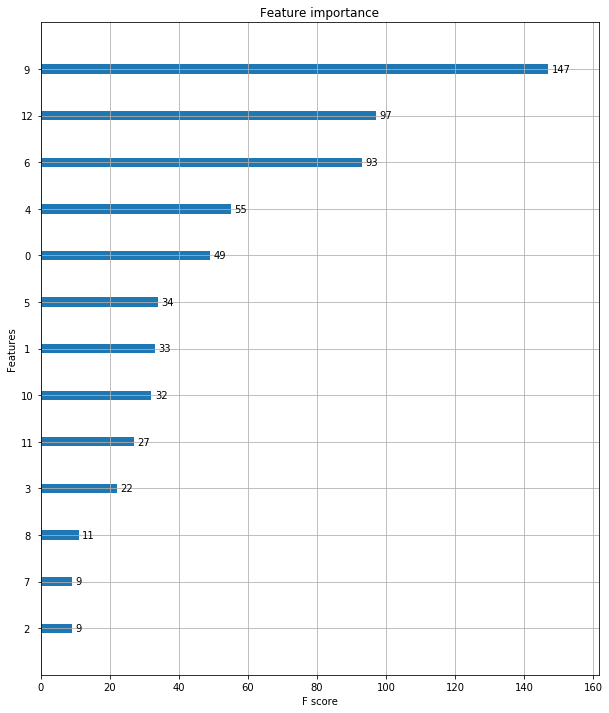

In [24]:
# plot_importance graph
fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)

### Wine - LightGBM

#### LightGBM을 이용하여 wine data 분류 모델을 만들었을 때 성능을 적으시오
정확도 약 0.94

In [25]:
# lgbm
lgbm_wrapper=LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_pred=lgbm_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , lgbm_pred))

[1]	valid_0's multi_logloss: 0.976016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.888831
[3]	valid_0's multi_logloss: 0.816757
[4]	valid_0's multi_logloss: 0.752172
[5]	valid_0's multi_logloss: 0.696008
[6]	valid_0's multi_logloss: 0.645174
[7]	valid_0's multi_logloss: 0.600729
[8]	valid_0's multi_logloss: 0.560938
[9]	valid_0's multi_logloss: 0.524987
[10]	valid_0's multi_logloss: 0.494277
[11]	valid_0's multi_logloss: 0.461428
[12]	valid_0's multi_logloss: 0.436004
[13]	valid_0's multi_logloss: 0.41068
[14]	valid_0's multi_logloss: 0.38793
[15]	valid_0's multi_logloss: 0.367762
[16]	valid_0's multi_logloss: 0.346148
[17]	valid_0's multi_logloss: 0.326347
[18]	valid_0's multi_logloss: 0.310583
[19]	valid_0's multi_logloss: 0.294691
[20]	valid_0's multi_logloss: 0.280678
[21]	valid_0's multi_logloss: 0.268633
[22]	valid_0's multi_logloss: 0.255962
[23]	valid_0's multi_logloss: 0.24509
[24]	valid_0's multi_logloss: 0.234194
[25]	valid_0's